# Element, Specie and Composition objects

In [1]:
# Check that you have correct .pmgrc.yaml file in your user folder
import pymatgen as mg
si = mg.Element("Si")
print("Atomic mass of Si is {}".format(si.atomic_mass))
print("Si has a melting point of {}".format(si.melting_point))
print("Ionic radii for Si: {}".format(si.ionic_radii))
print("Atomic mass of Si in kg: {}".format(si.atomic_mass.to("kg")))

Atomic mass of Si is 28.0855 amu
Si has a melting point of 1687.0 K
Ionic radii for Si: {4: 0.54}
Atomic mass of Si in kg: 4.6637069207919995e-26 kg


In [2]:
fe2 = mg.Specie("Fe", 2) #Species are like Elements, except they have an explicit oxidation state.
print(fe2.atomic_mass)
print(fe2.ionic_radius)

55.845 amu
0.92 ang


In [3]:
comp = mg.Composition("Fe2O3")
print("Weight of Fe2O3 is {}".format(comp.weight))
print("Amount of Fe in Fe2O3 is {}".format(comp["Fe"]))
print("Atomic fraction of Fe is {}".format(comp.get_atomic_fraction("Fe")))
print("Weight fraction of Fe is {}".format(comp.get_wt_fraction("Fe")))

Weight of Fe2O3 is 159.6882 amu
Amount of Fe in Fe2O3 is 2.0
Atomic fraction of Fe is 0.4
Weight fraction of Fe is 0.699425505453753 


# Lattice & Structure objects

In [4]:
# Creates cubic Lattice with lattice parameter 4.2
lattice = mg.Lattice.cubic(4.2)
print(lattice.parameters)

(4.2, 4.2, 4.2, 90.0, 90.0, 90.0)


In [5]:
structure = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print("Unit cell vol = {}".format(structure.volume))
print("First site of the structure is {}".format(structure[1]))

Unit cell vol = 74.08800000000001
First site of the structure is [2.1 2.1 2.1] Cl


In [6]:
#manipulation with structure
structure.make_supercell([2, 2, 1]) #Make a 3 x 2 x 1 supercell of the structure

del structure[0] #Remove the first site
structure.append("Na", [0,0,0]) #Append a Na atom.
structure[-1] = "Li" #Change the last added atom to Li.
structure[0] = "Na", [0.01, 0.5, 0] #Shift the first atom by 0.01 in fractional coordinates in the x-direction.
immutable_structure = mg.IStructure.from_sites(structure) #Create an immutable structure (cannot be modified).
print(immutable_structure)

Full Formula (Na3 Li1 Cl4)
Reduced Formula: Na3LiCl4
abc   :   8.400000   8.400000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP       a     b    c
---  ----  ----  ----  ---
  0  Na    0.01  0.5   0
  1  Na    0.5   0     0
  2  Na    0.5   0.5   0
  3  Cl    0.25  0.25  0.5
  4  Cl    0.25  0.75  0.5
  5  Cl    0.75  0.25  0.5
  6  Cl    0.75  0.75  0.5
  7  Li    0     0     0


In [7]:
#from pymatgen.vis.structure_chemview  import quick_view
#quick_view(immutable_structure, bonds=True, conventional=False, transform=None, show_box=True, bond_tol=0.2, stick_radius=0.1)

# Basic analysis

In [8]:
#Determining the symmetry
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
finder = SpacegroupAnalyzer(structure)
print("The spacegroup is {}".format(finder.get_space_group_symbol()))

The spacegroup is Pmm2


In [9]:
from pymatgen.analysis.structure_matcher import StructureMatcher
#Let's create two structures which are the same topologically, but with different elements, and one lattice is larger.
s1 = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
s2 = mg.Structure(mg.Lattice.cubic(5), ["Rb", "F"], [[0, 0, 0], [0.5, 0.5, 0.5]])
m = StructureMatcher()
print(m.fit_anonymous(s1, s2)) #Returns a mapping which maps s1 and s2 onto each other. Strict element fitting is also available.

True


# Input/output

In [10]:
#Convenient IO to various formats. Format is intelligently determined from file name and extension.
structure.to(filename="POSCAR")
structure.to(filename="NaCl.cif")

#Or if you just supply fmt, you simply get a string.
#print(structure.to(fmt="poscar"))
#print(structure.to(fmt="cif"))

In [11]:
#Reading a structure from a file.
structure = mg.Structure.from_file("POSCAR")

In [11]:
from pymatgen.io.vasp.sets import MPRelaxSet # the path to POTCAR should be provided in ~/.pmgrc.yaml, which can be created using this command:  pmg config --add  PMG_VASP_PSP_DIR  /home/user/vasp_potentials/; the POTCAR files should be in subfolder POT_GGA_PAW_PBE
v = MPRelaxSet(structure)
v.write_input("MyInputFiles") #Writes a complete set of input files for structure to the directory MyInputFiles

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/inputs.py:1751: UserWarning:

Ignoring unknown variable type SHA256

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/inputs.py:1751: UserWarning:

Ignoring unknown variable type COPYR

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/sets.py:138: BadInputSetWarning:

POTCAR data with symbol Na_pv is not known by pymatgen to                    correspond with the selected potcar_functional PBE. This POTCAR                    is known to correspond with functionals ['PBE_54', 'unvie_PBE_52', 'PBE_52']. Please verify that                    you are using the right POTCARs!

/usr/local/lib/python3.6/dist-packages/pymatgen/io/vasp/sets.py:138: BadInputSetWarning:

POTCAR data with symbol Li_sv is not known by pymatgen to                    correspond with the selected potcar_functional PBE. This POTCAR                    is known to correspond with functionals ['PBE_54', 'unvie_PBE_52', 'PBE_52']. Please verify that     

# Getting structures from Databases

In [12]:
from pymatgen.ext.cod import COD # COD database http://www.crystallography.net/cod/
cod = COD()
structure = cod.get_structure_by_id(1010064)
print(structure)

Full Formula (Li8 O4)
Reduced Formula: Li2O
abc   :   4.610000   4.610000   4.610000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Li+   0.25  0.25  0.25
  1  Li+   0.25  0.75  0.75
  2  Li+   0.75  0.25  0.75
  3  Li+   0.75  0.75  0.25
  4  Li+   0.75  0.75  0.75
  5  Li+   0.75  0.25  0.25
  6  Li+   0.25  0.75  0.25
  7  Li+   0.25  0.25  0.75
  8  O2-   0     0     0
  9  O2-   0     0.5   0.5
 10  O2-   0.5   0     0.5
 11  O2-   0.5   0.5   0


# Getting band structure from a database

In [13]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
#This initiliazes the Rest connection to the Materials Project db.
# Put your own PMG_MAPI_KEY in ~/.pmgrc.yaml or use api_key as below
a = MPRester() # or try to use api_key='your_key'
#load the band structure from mp-3748, CuAlO2 from the MP db
bs = a.get_bandstructure_by_material_id("mp-3748")

In [14]:
#is the material a metal (i.e., the fermi level cross a band)
print(bs.is_metal())
#print information on the band gap
print(bs.get_band_gap())
#print the energy of the 20th band and 10th kpoint
print(bs.bands[Spin.up][20][10])
#print energy of direct band gap
print(bs.get_direct_band_gap())


False
{'direct': False, 'energy': 1.8148, 'transition': '(0.591,0.409,0.000)-\\Gamma'}
18.004
2.7100999999999997


In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Sci\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam

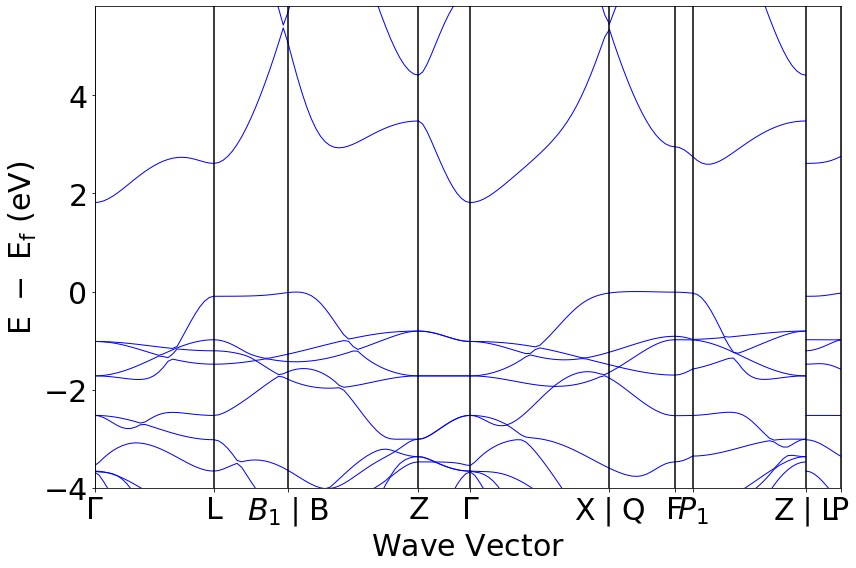

In [15]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
plotter = BSPlotter(bs)
plotter.get_plot().show()

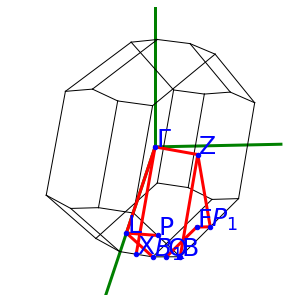

In [16]:
plotter.plot_brillouin()